<div style="text-align: center;">
    
# Analysis Online News Popularity Records
## Machine Learning for Artificial Intelligence
### Final Report
# 2023

</br>
</br>
</br>
</br>
</br>



<center>
<ul style="list-style-type: none;">
  <li>COHDSE221F004 T. A. A. Sudaraka</li>
  <li>COHDSE221F015 K. S. L. Kuruppu</li>
  <li>COHDSE221F023 D. D. Thimbiripalage</li>
</ul>
</center>


</br>
</br>
</br>
</br>
</br>

<img src="nibm.jpeg" alt="Your Image Alt Text" width="100"/>

---

<center>
<ul style="list-style-type: none;">
  <li>School of Computing and Engineering</li>
  <li>National Institute of Business Management</li>
  <li>Colombo-7</li>
</ul>
    </center>

</div>

##### Our team was able to find a data set called "Online News Popularity" from UCI Machine Learning Repository
##### This data set represents the numbers of shares (Popularity) of news articles published by Mashable in a period of 2 years

##### Data Set link: 
<a href='http://archive.ics.uci.edu/dataset/332/online+news+popularity'> Online News Popularity Data Set</a>

##### Video Presentation link: 
<a href='https://nibm-my.sharepoint.com/:f:/g/personal/cohdse221f-015_student_nibm_lk/Eo4KjTFkzIlApqTjQMv22_IBWAXDvcHa-7zUDHX1tgSjKA?e=9eG0pl'> https://nibm-my.sharepoint.com/:f:/g/personal/cohdse221f-015_student_nibm_lk/Eo4KjTFkzIlApqTjQMv22_IBWAXDvcHa-7zUDHX1tgSjKA?e=9eG0pl</a>

#### Description:

<ul style="list-style-type: square;">
  <li>Multivariate</li>
  <li>Business Subject Area</li>
  <li>Classification or Regression</li>
  <li>Integer or Real numbers</li>
  <li>39644 Original Instances</li>
  <li>61 Original Attributes</li>
</ul>

#### Cause this data set contains a numerical target variable (Not a categorical), Regression techniques can be used to analyze this data set.

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
news = pd.read_csv('OnlineNewsPopularity.csv')

In [3]:
news.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
news.shape

(39644, 61)

In [5]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [6]:
# Checking wheather columns names
news.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

</br>

# Quality of the Data

</br>

<ul style="list-style-type: square;">
  <li>Data set originally consists of 61 features and 39644 data points.</li>
  <li>Among 61 feauteres, first feature (url) is in Object type and other all features are in the numerical format</li>
  <li>Default target variable is in the type of Integer</li>
  <li>There is no missing values</li>
  <li>Type of the news (data_channel - feature) is in the numerical format. It is not in the categorical format. (We can assume that they have already make dummy variables for this)</li>
    <li>Published Data (weekday_is - feature) is in the numerical format. It is not in the categorical format. (We can assume that they have already make dummy variables for this as well)</li>
    <li> But, They didn't use dummy trapping for this. Therefore, there are few unnecessary cols.</li>
    <li>It is important to note here, other than url column, all the other column names has unnecessary white spaces.</li>
</ul>

#### Before applying any preprocessings, it is better to have a copy of the original data set.

In [7]:
news_copy_file = news.copy()
news_copy_file.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


</br>

# Data Preprocessing

</br>

#### First we have to remove unnecessary white spaces from column names

In [8]:
# Iterate through each column name and remove white spaces
news.columns = [col.strip() for col in news.columns] 

# Then , rename the existing names with trimed name using dictionaries
column_mapping = {col: col.strip() for col in news.columns}
news = news.rename(columns=column_mapping)
news.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [9]:
# According to above data set it shows the first column called url with object values. Cause it is a not numerical value column and 
# the column url is likely not directly relevant for predictive modeling tasks such as regression and classification.
# This column typically contains the URL of the article, which is unlikely to have a direct impact on the number of shares or the categorization of the article. 
# Therefore, we can exclude this column from our feature set when performing these tasks.

In [10]:
news_cleanned = news.drop(axis = 1,columns=['url'])
news_cleanned.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [11]:
news_cleanned.shape

(39644, 60)

In [12]:
news_cleanned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   timedelta                      39644 non-null  float64
 1   n_tokens_title                 39644 non-null  float64
 2   n_tokens_content               39644 non-null  float64
 3   n_unique_tokens                39644 non-null  float64
 4   n_non_stop_words               39644 non-null  float64
 5   n_non_stop_unique_tokens       39644 non-null  float64
 6   num_hrefs                      39644 non-null  float64
 7   num_self_hrefs                 39644 non-null  float64
 8   num_imgs                       39644 non-null  float64
 9   num_videos                     39644 non-null  float64
 10  average_token_length           39644 non-null  float64
 11  num_keywords                   39644 non-null  float64
 12  data_channel_is_lifestyle      39644 non-null 

### Dummy Trapping based on previous conclusions

In [13]:
# We can remove one feautere from each dummy variable set.
news_cleanned = news_cleanned.drop(columns=['data_channel_is_world','weekday_is_sunday'])
news_cleanned

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [14]:
news_cleanned.shape

(39644, 58)

## Make sure, there is any missing values in the data set

In [15]:
news_cleanned.isnull().sum()

timedelta                        0
n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_shares        0
self_reference_max_shares        0
self_reference_avg_s

#### There is no any missing values in this data set.

## Make sure, there is any duplicate values in the data set

In [16]:
news_cleanned.duplicated().sum()

0

#### There is no any duplicate values in this data set.

## Make sure, there is any outliers in the data set

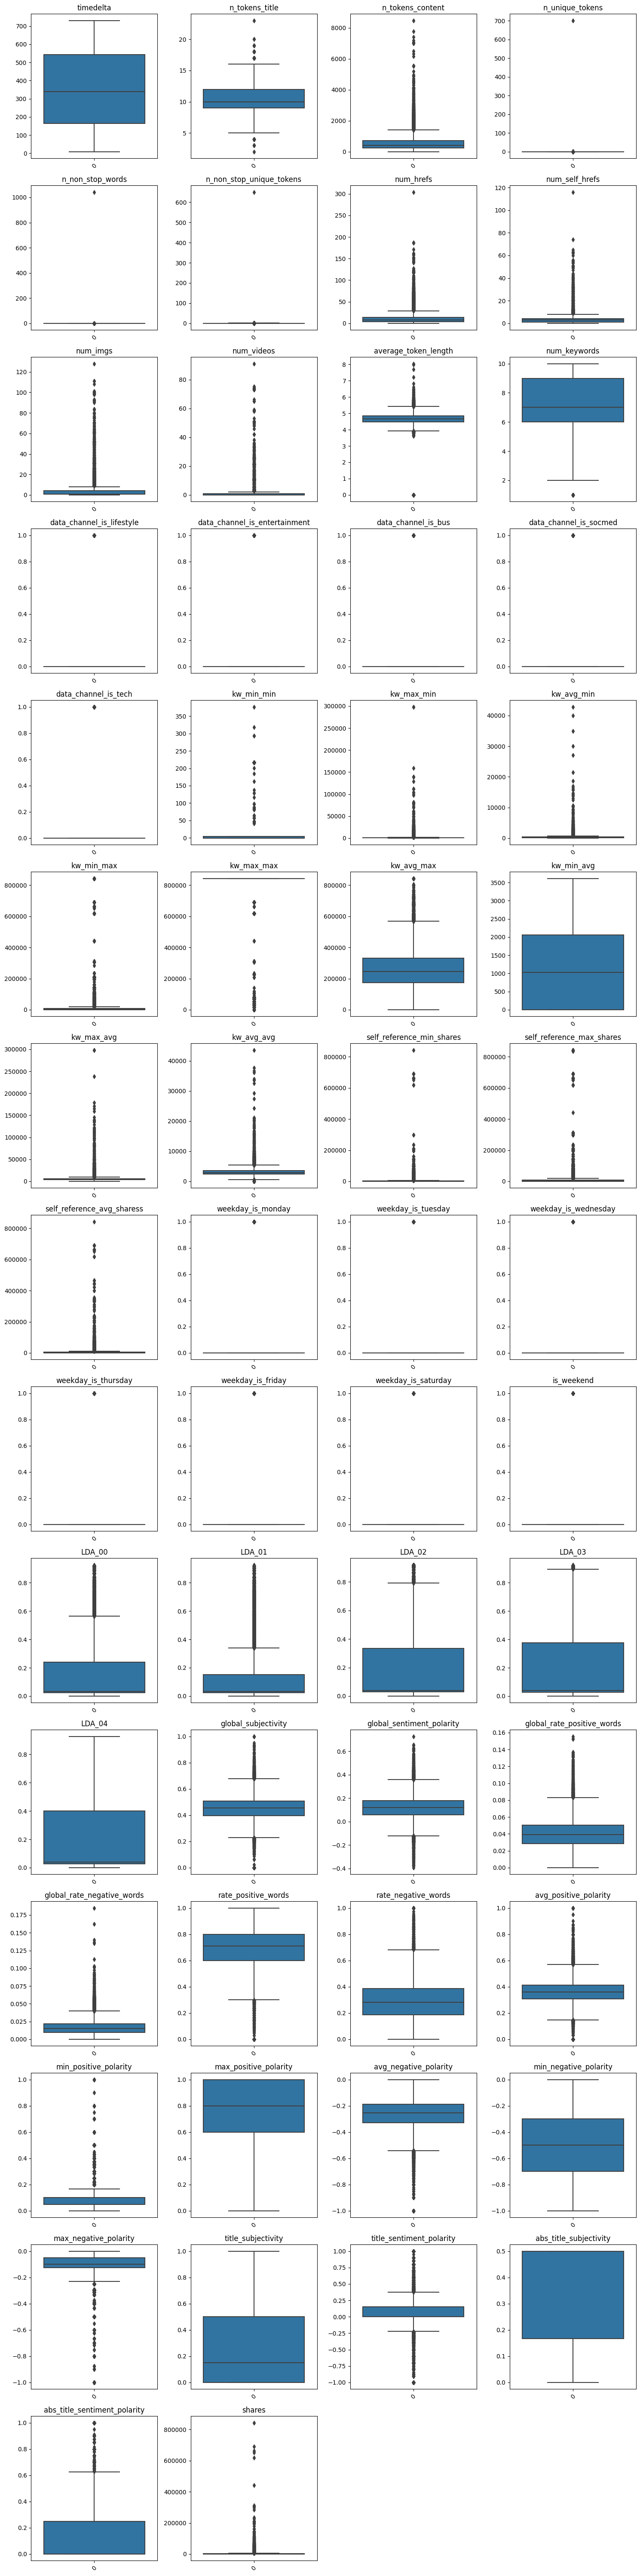

In [17]:
numeric_columns = news_cleanned.select_dtypes(include=['float64', 'int64']).columns

num_columns = len(numeric_columns)
num_rows = (num_columns - 1) // 4 + 1

plt.figure(figsize=(15, num_rows * 4))  

for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, 4, i + 1)
    sns.boxplot(data=news_cleanned[column])
    plt.title(column)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [18]:
# According to above box plot charts, some feautures have outliers. But, when we are manually checking that situation,
# those values are not anomolies or error values. 
#ex:
# column name: num_imgs -> This contains how many images are in the news article.
# According to the original data set, it has some news, contains 1,2,3 images, but there are some new articles, those has 20,15 images.
# That is not an anomoly. This can be happened. 
# If we remove, those values, it will create a huge negetive impact on the final model. Therefore, this onward, we 
# continue with this data set.

## Cleanned Data

In [19]:
news_cleanned.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


## After preprocessing, it is better to save the cleanned data in a new csv file

In [20]:
news_cleanned.to_csv('cleanned_news_data.csv')

# EDA

In [21]:
news_cleanned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   timedelta                      39644 non-null  float64
 1   n_tokens_title                 39644 non-null  float64
 2   n_tokens_content               39644 non-null  float64
 3   n_unique_tokens                39644 non-null  float64
 4   n_non_stop_words               39644 non-null  float64
 5   n_non_stop_unique_tokens       39644 non-null  float64
 6   num_hrefs                      39644 non-null  float64
 7   num_self_hrefs                 39644 non-null  float64
 8   num_imgs                       39644 non-null  float64
 9   num_videos                     39644 non-null  float64
 10  average_token_length           39644 non-null  float64
 11  num_keywords                   39644 non-null  float64
 12  data_channel_is_lifestyle      39644 non-null 

In [22]:
news_cleanned.describe(include= 'all')

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


## Analyzing Target Variable (number of shares)

C:\Users\sanug\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


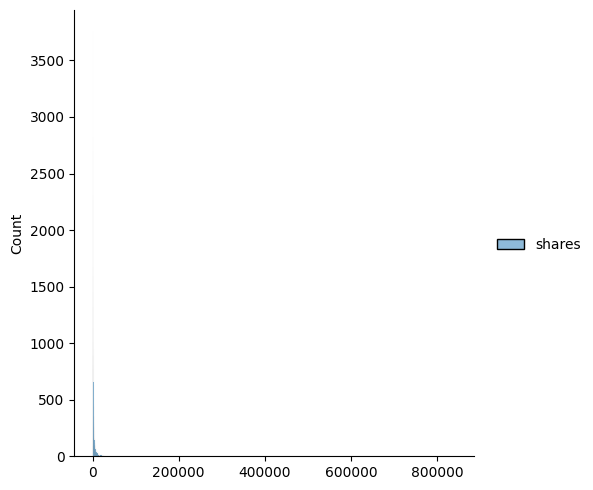

In [23]:
sns.displot(news_cleanned[["shares"]])

In [24]:
# According to above chart, it is clear that, targer variable values are not in the same scale. We have to scale the feature values to get better predictions
# In this we use logarithmic function to rescale. Then, 
# When we want to predict some thing, after training the models, we have to get the logarithm of the prediction using inverse function.

### Feature Scaling (Target variable)

In [25]:
news_cleanned['LogShares'] = np.log1p(news_cleanned['shares'])

C:\Users\sanug\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


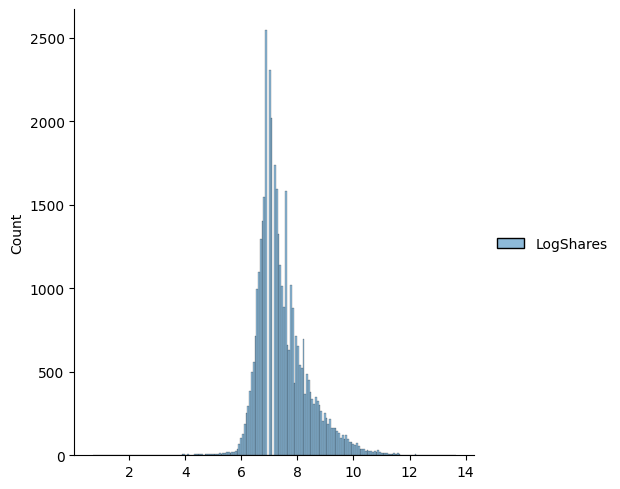

In [26]:
sns.displot(news_cleanned[["LogShares"]])

In [27]:
# Now, data set is okay and we have to remove the previous target variable 'shares'
news_cleanned = news_cleanned.drop(axis = 1,columns=['shares'])

In [28]:
news_cleanned

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,LogShares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,6.386879
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,6.568078
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,7.313887
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,7.090910
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,6.226537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,7.496097
39640,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,7.550135
39641,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,7.550135
39642,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,7.003974


In [29]:
# Our team tried to analyze this data set with pair plots and heat maps. Cause this data set is a 39644 , 58 shape data set, 
# This is too large to analyze using a regular laptop. 

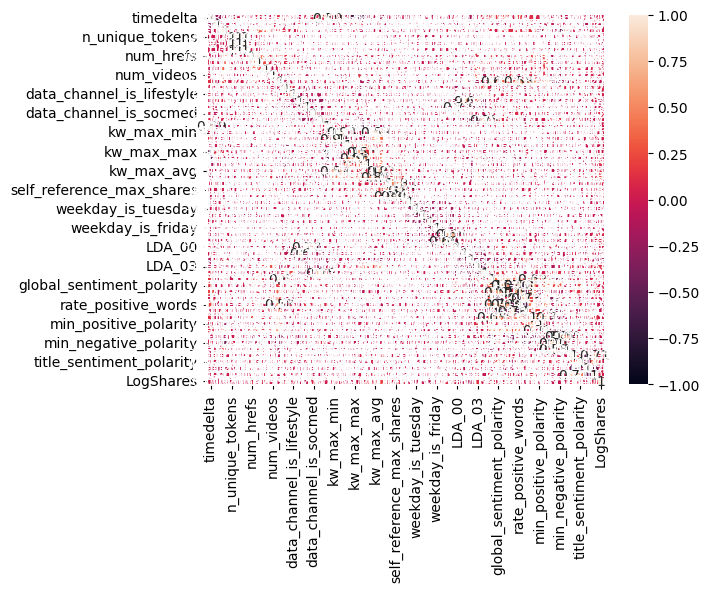

In [30]:
sns.heatmap(news_cleanned.corr(),vmin=-1,vmax=1,annot=True)
plt.show()

In [31]:
# Therefore, only for analyzing, we choose most important features and analyze like below

# Heat Maps

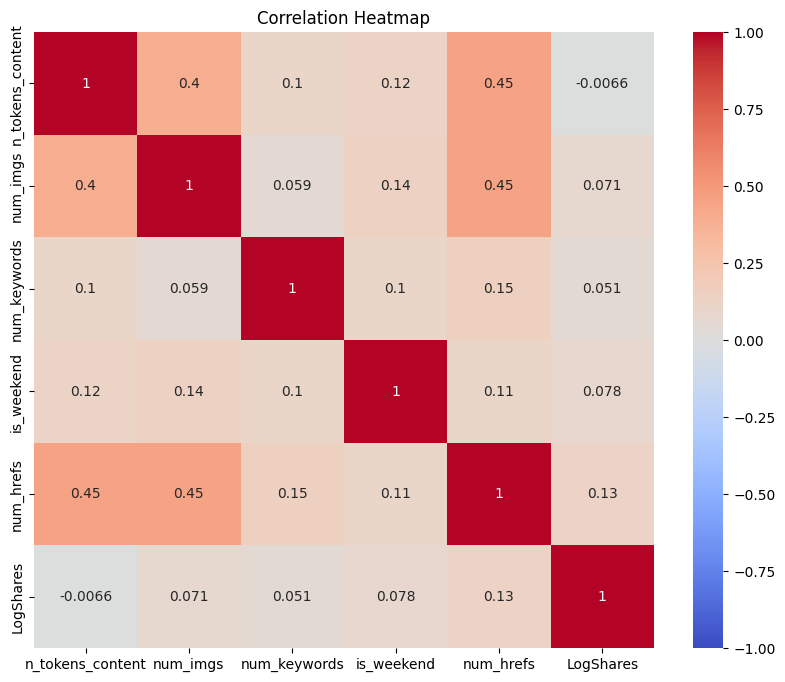

In [32]:
selected_features = ['n_tokens_content', 'num_imgs', 'num_keywords', 'is_weekend', 'num_hrefs', 'LogShares']

subset_size = 1000
subset = news_cleanned[selected_features].sample(n=subset_size, random_state=42)

correlation_matrix = subset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Pair Plots

C:\Users\sanug\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


[]

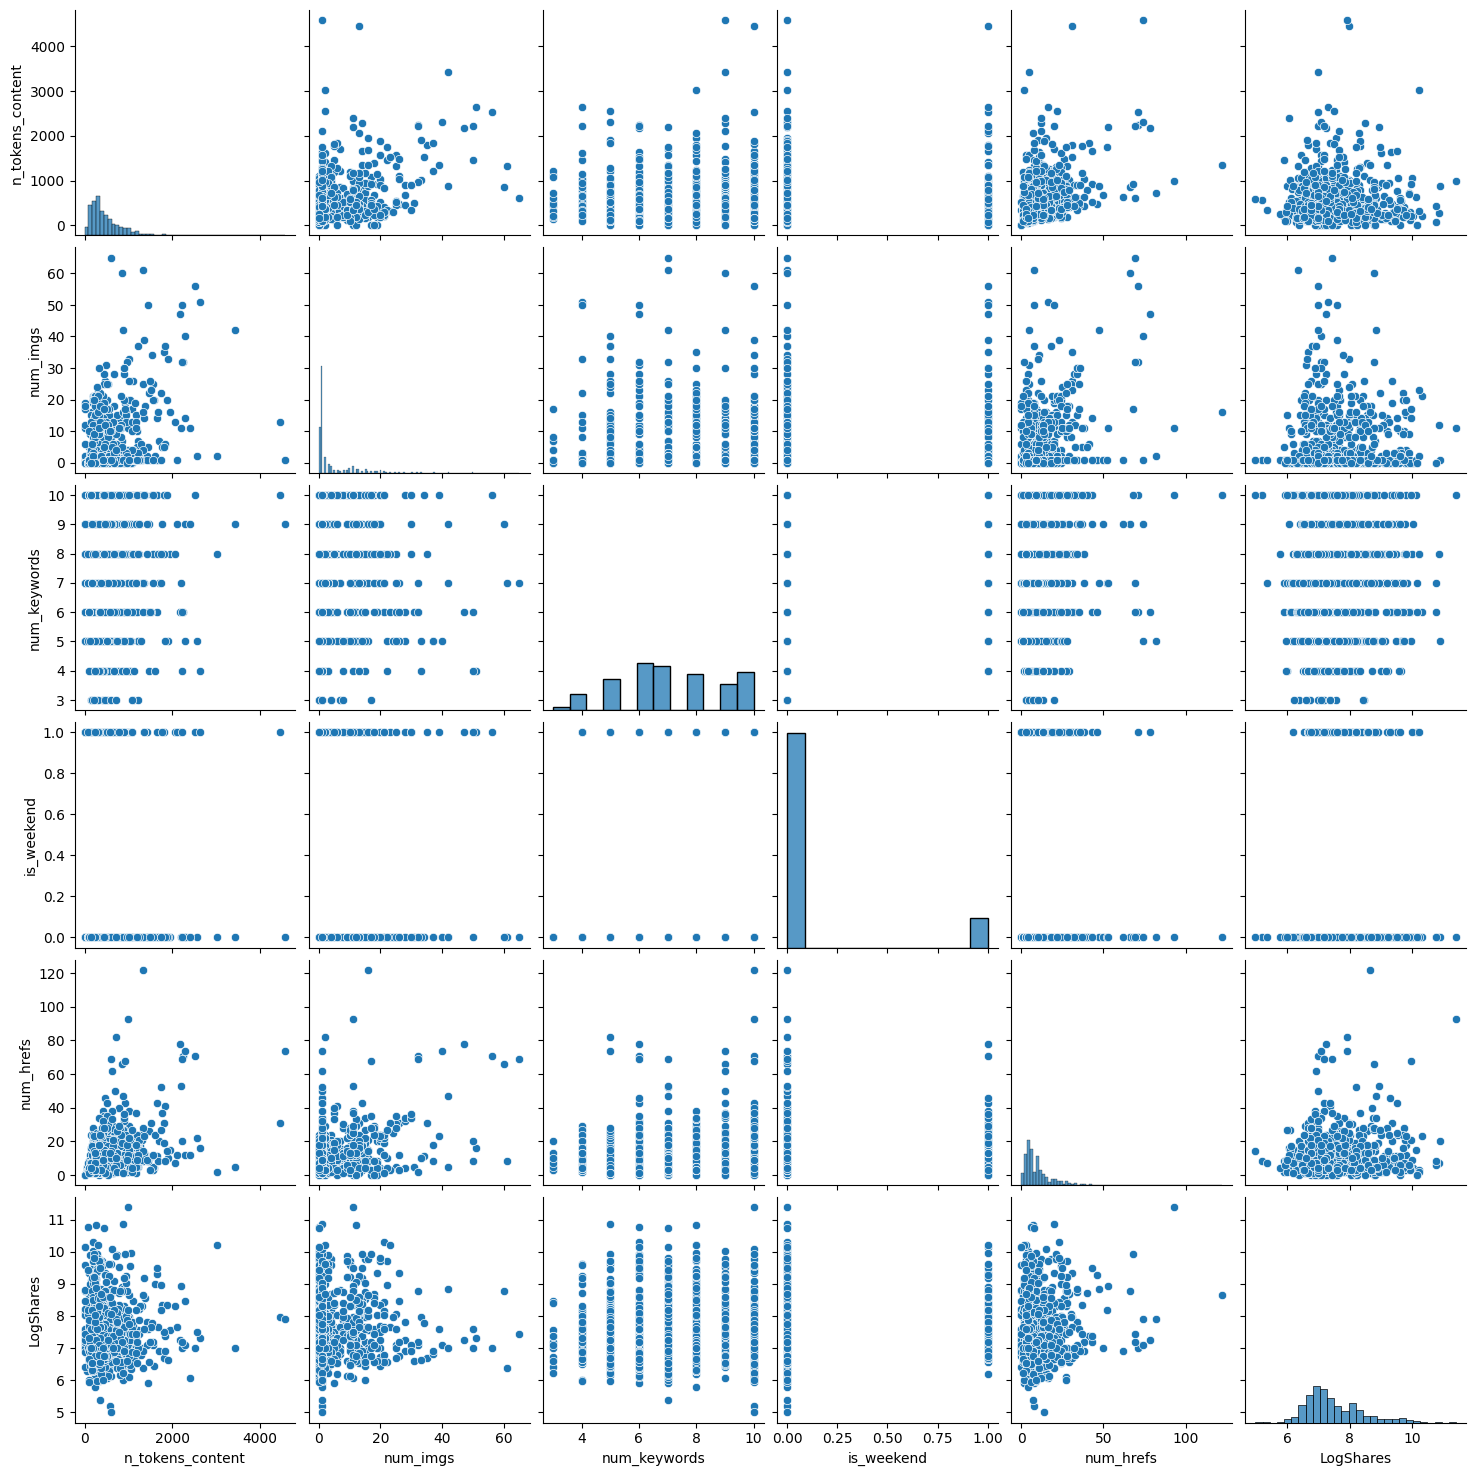

In [33]:
sns.pairplot(subset)
plt.plot()

# Correlation Table

In [34]:
news_cleanned.corr() # For all features

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,LogShares
timedelta,1.000000,-0.240320,-0.062867,0.002866,0.000089,0.003805,-0.000832,0.064530,-0.027636,0.000936,...,0.054772,0.098288,-0.000507,0.062175,-0.063239,-0.015919,0.038711,0.011551,-0.002745,0.019404
n_tokens_title,-0.240320,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,...,-0.025069,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550,-0.019048
n_tokens_content,-0.062867,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,...,-0.261493,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439,0.024846
n_unique_tokens,0.002866,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,...,0.009193,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217,0.004972
n_non_stop_words,0.000089,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,...,0.000904,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391,0.005407
n_non_stop_unique_tokens,0.003805,-0.005420,0.000373,0.999852,0.999532,1.000000,-0.004983,0.007584,0.014230,-0.000963,...,0.008380,-0.002245,-0.001972,0.004318,-0.006708,-0.005860,-0.002910,-0.008572,-0.005342,0.003710
num_hrefs,-0.000832,-0.053496,0.423065,-0.004352,0.005521,-0.004983,1.000000,0.396452,0.342633,0.114518,...,-0.082168,0.286733,-0.152146,-0.263576,0.054948,0.043950,0.039041,0.009443,0.056525,0.105142
num_self_hrefs,0.064530,-0.014856,0.304682,0.006620,0.013598,0.007584,0.396452,1.000000,0.238586,0.077458,...,-0.072648,0.189922,-0.058222,-0.122071,0.039153,-0.011239,0.026224,0.008961,-0.006709,0.029113
num_imgs,-0.027636,-0.008858,0.342600,0.018802,0.028486,0.014230,0.342633,0.238586,1.000000,-0.067336,...,-0.024683,0.155232,-0.072500,-0.136522,0.042644,0.056815,0.046310,-0.013759,0.063307,0.091519
num_videos,0.000936,0.051460,0.103699,-0.000597,-0.000899,-0.000963,0.114518,0.077458,-0.067336,1.000000,...,-0.010103,0.125659,-0.115976,-0.138190,0.027251,0.061028,0.021980,-0.021982,0.055231,0.032151


### Highest correlation feature pairs 

In [35]:
correlation_matrix = news_cleanned.corr()

correlation_threshold = 0.6

highly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        feature1 = correlation_matrix.columns[i]
        feature2 = correlation_matrix.columns[j]
        
        correlation_value = correlation_matrix.iloc[i, j]
        
        if abs(correlation_value) > correlation_threshold:
            highly_correlated_pairs.append((feature1, feature2, correlation_value))
        
        highly_correlated_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

for pair in highly_correlated_pairs:
    print(f"Features: {pair[0]}, {pair[1]}, Correlation: {pair[2]}")


Features: n_unique_tokens, n_non_stop_unique_tokens, Correlation: 0.9998515160178297
Features: n_unique_tokens, n_non_stop_words, Correlation: 0.9995717371218911
Features: n_non_stop_words, n_non_stop_unique_tokens, Correlation: 0.9995323282505376
Features: kw_max_min, kw_avg_min, Correlation: 0.9405286635291802
Features: kw_min_min, kw_max_max, Correlation: -0.8572262246429739
Features: self_reference_max_shares, self_reference_avg_sharess, Correlation: 0.8534802286627771
Features: self_reference_min_shares, self_reference_avg_sharess, Correlation: 0.8189071252672916
Features: kw_max_avg, kw_avg_avg, Correlation: 0.8118643951010985
Features: global_rate_negative_words, rate_negative_words, Correlation: 0.7795556150649772
Features: data_channel_is_bus, LDA_00, Correlation: 0.7746505220376488
Features: data_channel_is_tech, LDA_04, Correlation: 0.7497371213874283
Features: avg_negative_polarity, min_negative_polarity, Correlation: 0.7488961778499011
Features: global_sentiment_polarity, 

##### Cause the defualt target variable of this data set is not a categorical feature, we can use reggresion algorithms

# Model Creation

</br>

## Linear Regression

#### Splitting data set

In [36]:
x_values=news_cleanned.iloc[:,:57].values
y_values=news_cleanned.iloc[:,57].values 

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x_values,y_values,test_size=0.2,random_state=0)

In [38]:
model = LinearRegression()

In [39]:
model.fit(x_train,y_train)

LinearRegression()

### List of coefficient

In [40]:
pd.DataFrame(model.coef_,index=news_cleanned.columns[0:57],columns=["Coefficient Values"])

,Coefficient Values
timedelta,4.930910e-05
n_tokens_title,7.130852e-03
n_tokens_content,2.207473e-05
n_unique_tokens,1.091997e-01
n_non_stop_words,6.919068e-02
n_non_stop_unique_tokens,-2.477941e-01
num_hrefs,4.310849e-03
num_self_hrefs,-8.319841e-03
num_imgs,2.855756e-03
num_videos,2.505071e-03


### Intercept value

In [41]:
model.intercept_

6.529787420482924

### Predict using testing values

In [42]:
y_pred = model.predict(x_test)
y_pred

array([7.12595533, 7.38113865, 7.57246789, ..., 7.80411661, 7.04009761,
       7.59341012])

### Root Mean Square Error of this model

In [43]:
RMSE=np.sqrt(mean_squared_error(y_pred,y_test)) 
RMSE

0.8846255023326315

### How well fit this data into the model

In [44]:
model.score(x_train,y_train)

0.1281877863930142

### Getting overall performance of the model

In [45]:
x_values_constant=sm.add_constant(x_train)

In [46]:
lm_sm=sm.OLS(y_train,x_values_constant)

In [47]:
result=lm_sm.fit() 

In [48]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     84.64
Date:                Sat, 26 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:36:44   Log-Likelihood:                -40541.
No. Observations:               31715   AIC:                         8.119e+04
Df Residuals:                   31659   BIC:                         8.166e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7779      0.050     95.629      0.0

</br>

## Deep Learning Regression (Neural Network with Tensorflow Library)

In [49]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [51]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [52]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [53]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
793/793 [==============================] - 2s 1ms/step - loss: 2692017.7500 - val_loss: 260479.3906
Epoch 2/50
793/793 [==============================] - 1s 1ms/step - loss: 466682.3125 - val_loss: 150794.4375
Epoch 3/50
793/793 [==============================] - 1s 1ms/step - loss: 316299.7812 - val_loss: 109564.0938
Epoch 4/50
793/793 [==============================] - 1s 1ms/step - loss: 160392.3750 - val_loss: 36191.1484
Epoch 5/50
793/793 [==============================] - 1s 1ms/step - loss: 266798.0938 - val_loss: 105751.0469
Epoch 6/50
793/793 [==============================] - 1s 1ms/step - loss: 187395.5312 - val_loss: 42493.0234
Epoch 7/50
793/793 [==============================] - 1s 1ms/step - loss: 165927.2500 - val_loss: 32641.1934
Epoch 8/50
793/793 [==============================] - 1s 1ms/step - loss: 92626.2031 - val_loss: 29998.1719
Epoch 9/50
793/793 [==============================] - 1s 1ms/step - loss: 62763.0820 - val_loss: 41118.0508
Epoch 10/50
793/

### Predict using testing values

In [54]:
y_pred_neural_networks = model.predict(x_test)

248/248 [==============================] - 0s 881us/step


### Root Mean Square Error of this model

In [55]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_neural_networks))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 2.974757148276442


### Getting overall performance of the model

In [56]:
x_values_constant=sm.add_constant(x_train)

In [57]:
lm_sm=sm.OLS(y_train,x_values_constant)

In [58]:
result=lm_sm.fit() 

In [59]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     84.64
Date:                Sat, 26 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:37:59   Log-Likelihood:                -40541.
No. Observations:               31715   AIC:                         8.119e+04
Df Residuals:                   31659   BIC:                         8.166e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7779      0.050     95.629      0.0

</br>

## Random Forest Reggression

In [60]:
x_values_sub=subset.iloc[:,:5].values
y_values_sub=subset.iloc[:,5].values 

In [61]:
x_train_sb,x_test_sb,y_train_sb,y_test_sb=train_test_split(x_values_sub,y_values_sub,test_size=0.2,random_state=0)

In [62]:
params={"n_estimators":[100,200,300,400,500]}
model=RandomForestRegressor()
cval=KFold(n_splits=5)

In [63]:
gsearch=GridSearchCV(model,params,cv=cval)

In [64]:
results=gsearch.fit(x_train_sb,y_train_sb)
results.best_params_ 

{'n_estimators': 300}

In [65]:
rf = RandomForestRegressor(n_estimators=300)

In [66]:
rf.fit(x_train_sb, y_train_sb)

RandomForestRegressor(n_estimators=300)

In [67]:
y_pred_sb=rf.predict(x_test_sb)

In [68]:
RMSE=np.sqrt(mean_squared_error(y_pred_sb,y_test_sb)) 
RMSE

1.0033837336950937

In [69]:
idx=np.argsort(rf.feature_importances_)

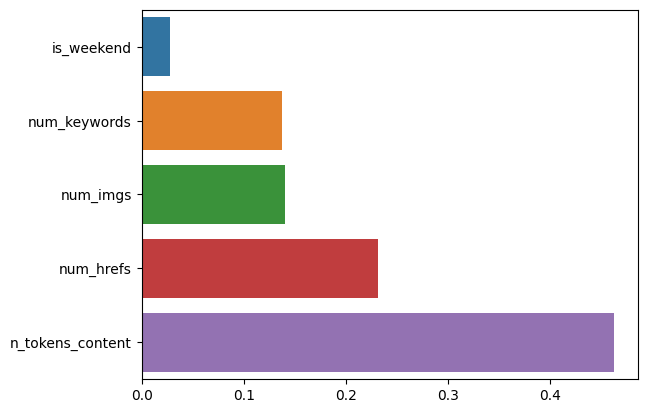

In [70]:
sns.barplot(x=rf.feature_importances_[idx],y=subset.columns[:5][idx])
plt.show()

</br>

## K Nearest Neighbors Reggression

In [71]:
x_values=news_cleanned.iloc[:,:57].values
y_values=news_cleanned.iloc[:,57].values 

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x_values,y_values,test_size=0.2,random_state=0)

In [82]:
Errors = []
K = np.arange(1, 21)

for k in K:
    model_knn = KNeighborsRegressor(n_neighbors=k)
    cvals = np.sqrt(-cross_val_score(model_knn, x_train, y_train, cv=10, scoring="neg_mean_squared_error"))
    Errors.append(cvals.mean())
    print(f"k: {k}, RMSE: {cvals.mean()}")

k: 1, RMSE: 1.228280610093675
k: 2, RMSE: 1.0632215758831616
k: 3, RMSE: 1.0108473592676488
k: 4, RMSE: 0.9815529051760048
k: 5, RMSE: 0.9627395490033874
k: 6, RMSE: 0.9507896841749421
k: 7, RMSE: 0.9410122726497694
k: 8, RMSE: 0.9339911234411458
k: 9, RMSE: 0.9301232034378637
k: 10, RMSE: 0.9260034398625587
k: 11, RMSE: 0.9239375853717592
k: 12, RMSE: 0.9214139271770904
k: 13, RMSE: 0.9194999606362977
k: 14, RMSE: 0.9176821188649976
k: 15, RMSE: 0.9159654421560145
k: 16, RMSE: 0.9146506991980126
k: 17, RMSE: 0.9129806240441045
k: 18, RMSE: 0.9120751205539264
k: 19, RMSE: 0.9110883741719917
k: 20, RMSE: 0.9100569476180084


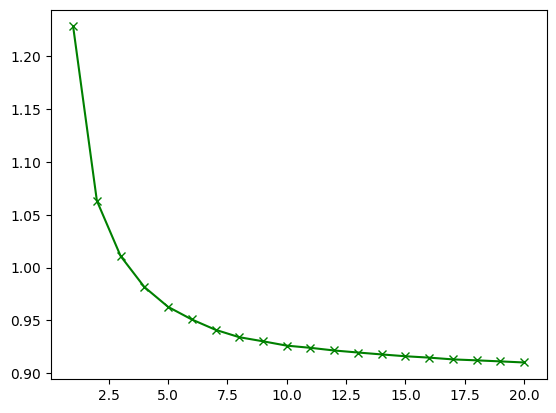

In [83]:
plt.plot(K,Errors,"gx-")
plt.show()

In [ ]:
## We can use k = 5

In [84]:
knn = KNeighborsRegressor(n_neighbors=5)

In [85]:
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [86]:
y_prediction=knn.predict(x_test)

In [87]:
RMSE=np.sqrt(mean_squared_error(y_prediction,y_test)) 
RMSE

0.9525989297551777

# Comparing the model performances

In [88]:
linear_regression_rmse = 0.8846255023326315
deep_learning_regression_rmse = 2.974757148276442
random_forest_regression_rmse = 1.0033837336950937
knn_regression_rmse = 0.9525989297551777

In [89]:
pd.DataFrame({"Model":["Linear Regression","Deep Learning Regression","Random Forest Regression","KNN Regression"],"RMSE":[linear_regression_rmse,deep_learning_regression_rmse,random_forest_regression_rmse,knn_regression_rmse]})

,Model,RMSE
0,Linear Regression,0.884626
1,Deep Learning Regression,2.974757
2,Random Forest Regression,1.003384
3,KNN Regression,0.952599


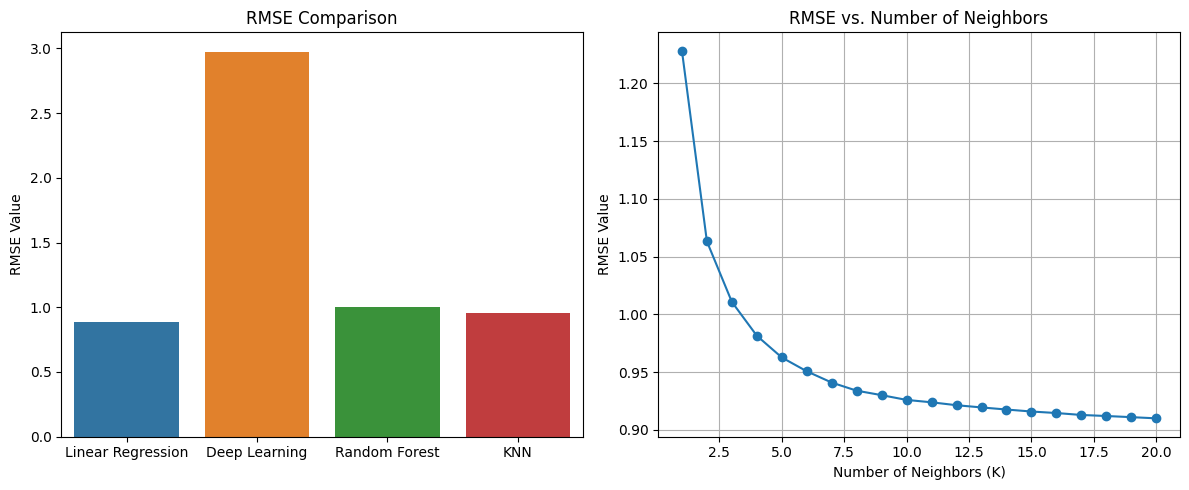

In [94]:
models = ["Linear Regression", "Deep Learning", "Random Forest", "KNN"]
rmse_values = [linear_regression_rmse, deep_learning_regression_rmse, random_forest_regression_rmse, knn_regression_rmse]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=models, y=rmse_values, ax=axs[0])
axs[0].set_title("RMSE Comparison")
axs[0].set_ylabel("RMSE Value")

axs[1].plot(range(1, 21), Errors, marker='o')
axs[1].set_title("RMSE vs. Number of Neighbors")
axs[1].set_xlabel("Number of Neighbors (K)")
axs[1].set_ylabel("RMSE Value")
axs[1].grid(True)

plt.tight_layout()
plt.show()

# Discussion And Conclusion

<ul style="list-style-type: dot;">
  <li>For analyzing this data set, we were able to use several machine learning libraries such as TensorFlow, scikit-learn, NumPy, and pandas, statsmodels.</li>
  <li>The original data set contains 39644 data points and 61 features.</li>
  <li>Prior to applying any preprocessing technique, we checked the quality of the data set.</li>
  <li>All the features are numerical without the feature called URL (Object type).</li>
  <li>Target variable (Shares) is also in numeric type (Integer).</li>
  <li>There are no missing values.</li>
  <li>Originally, the data set contains dummy variables, but it contains unnecessary dummy variables.</li>
  <li>Therefore, those unnecessary dummy variables were removed.</li>
  <li>There are no duplicate values.</li>
  <li>When checking outliers with a boxplot chart, some data points were observed. However, these values are not errors or anomalies upon manual inspection. Removing or transforming these values could introduce bias, so we continued with this data set.</li>
  <li>In the EDA process, we rescaled the target variable values using a logarithmic function due to left-skewness.</li>
  <li>For pair plots and heat maps, we created a subset of the data set to handle the computational complexity.</li>
  <li>After training the model with several regression algorithms, we determined that the best algorithm for predicting the number of shares is the linear regression model, as it produced the minimum Root Mean Squared Error value.</li>
  <li>It is important to note that we rescaled the target variable value with a logarithmic function. Therefore, to obtain the actual prediction, we need to use the inverse of the logarithmic function to ensure accurate prediction.</li>
</ul>
